<a href="https://colab.research.google.com/github/AnnaPaulaFigueiredo/Imersao-Dados-Alura/blob/main/Dia4Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)


exam = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
# Adicionando uma coluna de notas totais
totalGrade = data[exam].sum(axis=1)

# Adicionando no dataframe dados
data["NU_NOTA_TOTAL"] = totalGrade
data.head()

# Filtrando o dataset, onde a nota total não é zero
dataNotZero = data.query("NU_NOTA_TOTAL != 0")

In [41]:
exam =["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO", "NU_NOTA_MT"]

# Separando os dados que quero que sejam a entrada e saída
exam_in = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
exam_out = "NU_NOTA_MT"

# Remover os NaN pois o modelo não aceita esses dados
dataNotZero = dataNotZero[exam].dropna()

grade_in = dataNotZero[exam_in]
grade_out = dataNotZero[exam_out]


In [42]:
# Serparando em x e y, análogo a f(y) -> y
x = grade_in
y = grade_out

In [43]:
# Separando em Dados de Treino e Teste
from sklearn.model_selection import train_test_split

SEED = 4321

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED)

In [44]:
# Aplicando o modelo de Linear SVR (REGRESSÃO)

from sklearn.svm import LinearSVR

model_LinearSVM = LinearSVR(random_state = SEED)
model_LinearSVM.fit(x_train, y_train)

# Usando o modelo LinearSVM, para predizer as notas de x_teste
predict_math = modelo.predict(x_test)
predict_math[0:5]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



array([564.48610537, 628.305027  , 509.98098555, 593.68114412,
       579.78458758])

In [45]:
# Verificando os dados de treino matemática, reforçando y = o que eu quero encontrar
y_test[0:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

In [58]:
result_math = pd.DataFrame()
result_math["Real"] = y_test
result_math["Prediction"] = predict_math
result_math["Difference"] = abs(result_math["Real"] - result_math["Prediction"])

66.04555425503273

In [59]:
# Calculando os erros, aqui a pontuação significa a diferença de erros positivamente e negativamente
result_math["Difference"].mean()

66.04555425503273

In [48]:
# Calcula a média dos erros do modelo
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, predict_math)

66.04555425503301

Desafio 1: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

In [60]:
# Aplicando o algoritmo de Regressão Linear
from sklearn import linear_model

model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)

linear_predict = model_linear.predict(x_test)

In [61]:
linear_predict[0:5]

array([538.00124832, 609.72786088, 487.44422738, 569.12940392,
       561.3090307 ])

In [62]:
y_test[0:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

In [63]:
mean_absolute_error(y_teste, linear_predict)

62.33318493190139

In [70]:
# Near neighbors
from sklearn.neighbors import KNeighborsRegressor

model_neigh = KNeighborsRegressor()
model_neigh.fit(x_train, y_train)
neigh_predict = model_neigh.predict(x_test)


# Decision tree
from sklearn import tree

model_tree = tree.DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
tree_predict = model_tree.predict(x_test)


(-1000.0, 1000.0)

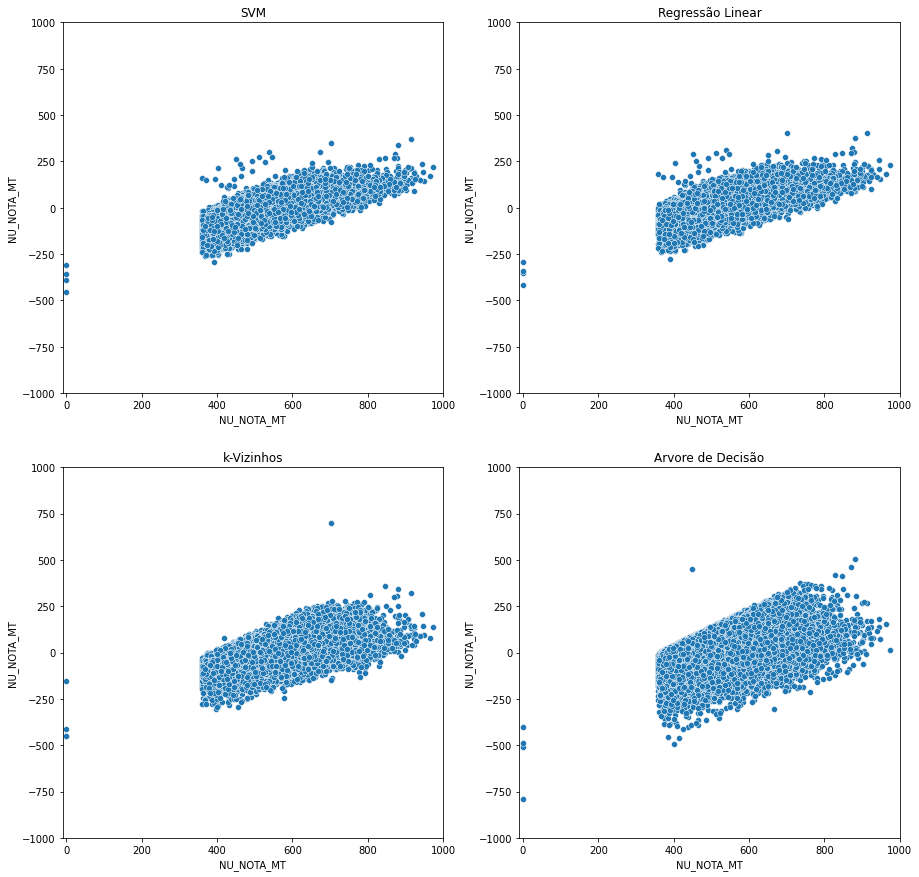

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))


sns.scatterplot(x=y_test, y=y_test - predict_math, ax=axs[0,0])
axs[0,0].set_title('SVM')
axs[0,0].set_xlim(-10, 1000)
axs[0,0].set_ylim(-1000, 1000)

sns.scatterplot(x=y_test, y=y_test - linear_predict, ax=axs[0,1])
axs[0,1].set_title('Regressão Linear')
axs[0,1].set_xlim(-10, 1000)
axs[0,1].set_ylim(-1000, 1000)

sns.scatterplot(x=y_test, y=y_test - neigh_predict, ax=axs[1,0])
axs[1,0].set_title('k-Vizinhos')
axs[1,0].set_xlim(-10, 1000)
axs[1,0].set_ylim(-1000, 1000)

sns.scatterplot(x=y_test, y=y_test - tree_predict, ax=axs[1,1])
axs[1,1].set_title('Arvore de Decisão')
axs[1,1].set_xlim(-10, 1000)
axs[1,1].set_ylim(-1000, 1000)

Desafio 2: Ler a documentação do Dummy e alterar o método de regressão.

In [65]:
# metodos de regressão : mean and median
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

model_dummy = DummyRegressor(strategy='mean') 
model_dummy.fit(x_train, y_train)
dummy_predict = model_dummy.predict(x_test)

# Verificando o erro do algoritimo
mean_absolute_error(y_teste, dummy_predict)

90.38717491270496

In [66]:
# Verificando o erro do algoritimo

mean_absolute_error(y_teste, dummy_predict)

90.38717491270496

In [68]:
# como método de regressão median

model_dummy = DummyRegressor(strategy='median') 
model_dummy.fit(x_train, y_train)
dummy_predict = model_dummy.predict(x_test)

# Verificando o erro do algoritimo
mean_absolute_error(y_teste, dummy_predict)


89.0523384482386

Desafio 3: Buscar outra métrica para avaliar modelos de regressão.

In [ ]:
# Em aula foi utilizado o mean_squared_error()